# TensorFlow 2.0

In [1]:
from glob import glob

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

import matplotlib.pyplot as plt
%matplotlib inline

## Hyperparameter Tunning

In [2]:
num_epochs = 10
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (32, 32, 3)
num_classes = 10

## Build Model

In [3]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [4]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

# Data Preprocess

In [5]:
train_path = glob('../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/*.png')
test_path = glob('../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/test/*.png')

In [6]:
path = train_path[0]
path

'../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/32270_deer.png'

In [49]:
# class 값 가져오기
def get_class_name(path):
    fname = tf.strings.split(path,'_')[-1]
    lbl_name = tf.strings.regex_replace(fname,'.png','')
    return lbl_name


In [43]:
get_class_name(path)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'../../../Library/Mobile Documents/com~apple~CloudDocs/\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\xec\x82\xac\xec\x9d\xb4\xec\x96\xb8\xed\x8b\xb0\xec\x8a\xa4\xed\x8a\xb8/\xeb\x94\xa5\xeb\x9f\xac\xeb\x8b\x9d:AI/Part3) \xec\x9d\xb4\xeb\xaf\xb8\xec\xa7\x80 \xeb\xb6\x84\xec\x84\x9d\xec\x9c\xbc\xeb\xa1\x9c \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 tensorflow 2.0\xea\xb3\xbc Pytorch/dataset/cifar/train/46506',
       b'deer'], dtype=object)>

In [30]:
class_names = [get_class_name(path) for path in train_path]
classes = tf.unique(class_names).y.numpy()

In [50]:
classes = tf.unique(class_names).y.numpy()
classes == get_class_name(path)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True, False, False, False, False, False, False, False, False,
       False])>

In [45]:
# 조건에 맞는 값을 원핫인코딩 실시
onehot_encdoing = tf.cast(classes == get_class_name(path), tf.uint8)

In [51]:
## onehot인코딩 함수화
def onehot_encoding(label_name):
    classes == get_class_name(path)
    onehot_encdoing = tf.cast(classes == get_class_name(path), tf.uint8)
    return onehot_encdoing

In [80]:
# 이미지와 이미지명 값 가져오기
def read_dataset(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)

    image = tf.cast(image,tf.float32)/255

    # read label
    class_name = get_class_name(path)
    label = onehot_encoding(class_name)
    return image, label

In [81]:
image, label = read_dataset(path)
image.shape, label.shape

(TensorShape([32, 32, 3]), TensorShape([10]))

In [82]:
# 랜덤하게 상하좌우 움직임 반응
def image_preprocess(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

In [83]:
transform, label = image_preprocess(image, label)
transform.shape

TensorShape([32, 32, 3])

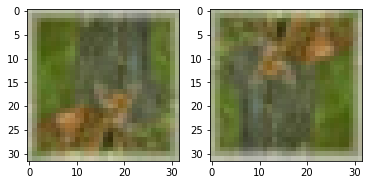

In [84]:
plt.subplot(121)
plt.imshow(image)

plt.subplot(122)
plt.imshow(transform)

plt.show()

In [85]:
# train dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices(train_path)
train_dataset = train_dataset.map(read_dataset)
train_dataset = train_dataset.map(image_preprocess) # transform images
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size =len(train_path))
train_dataset = train_dataset.repeat()

In [87]:
# test dataset 구성
test_dataset = tf.data.Dataset.from_tensor_slices(test_path)
test_dataset = test_dataset.map(read_dataset)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size =len(test_path))
test_dataset = test_dataset.repeat()

## 정리

In [ ]:
# class 값 가져오기
def get_class_name(path):
    fname = tf.strings.split(path,'_')[-1]
    lbl_name = tf.strings.regex_replace(fname,'.png','')
    return lbl_name

class_names = [get_class_name(path) for path in train_path]
classes = tf.unique(class_names).y.numpy()

## onehot인코딩 함수화
def onehot_encoding(label_name):
    classes == get_class_name(path)
    onehot_encdoing = tf.cast(classes == get_class_name(path), tf.uint8)
    return onehot_encdoing

In [ ]:
# 이미지와 이미지명 값 가져오기
def read_dataset(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)

    image = tf.cast(image,tf.float32)/255

    # read label
    class_name = get_class_name(path)
    label = onehot_encoding(class_name)
    return image, label

In [ ]:
# 랜덤하게 상하좌우 움직임 반응
def image_preprocess(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

In [ ]:
# train dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices(train_path)
train_dataset = train_dataset.map(read_dataset)
train_dataset = train_dataset.map(image_preprocess) # transform images
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size =len(train_path))
train_dataset = train_dataset.repeat()

In [ ]:
# test dataset 구성
test_dataset = tf.data.Dataset.from_tensor_slices(test_path)
test_dataset = test_dataset.map(read_dataset)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size =len(test_path))
test_dataset = test_dataset.repeat()

## Training
- 모델 학습

In [94]:
steps_per_epoch = len(train_path) // batch_size
validation_steps = len(test_path) // batch_size

In [96]:
# model.fit_generator(
#     train_dataset,
#     steps_per_epoch= steps_per_epoch,
#     validation_data = test_dataset,
#     validation_steps = validation_steps,
#     epochs = num_epochs
# )